In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neural_networks import Sequential
from layers import Dense
from errors import MeanSquaredError
from utils import BagOfWords, preprocess_data, get_batches

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,Task,Importance,Time to complete (minutes)
0,0,Fix broken appliance,7,60
1,1,Sort and organize important documents,4,60
2,2,Plan product launch event,9,120
3,3,Volunteer at the local shelter,9,120
4,4,Walk the Dog,3,20


In [3]:
X = preprocess_data(list(df["Task"]))
vocabulary = set()
for example in X:
    for word in example:
        vocabulary.add(word)
bag_of_words = BagOfWords(vocabulary=list(vocabulary))
X = bag_of_words.encode(X)
y = np.asarray(df["Importance"]).reshape((-1, 1))
print(X.shape)
print(y.shape)

(10003, 1564)
(10003, 1)


In [4]:
X_batches, y_batches = get_batches(X, y, batch_size=16)
print(X_batches[0].shape)

(16, 1564)


In [5]:
model = Sequential([
    Dense(input_units=X.shape[1], output_units=100, activation='relu'),
    Dense(input_units=100, output_units=1, activation='linear')
])
model.compile(error=MeanSquaredError(), learning_rate=1e-4)

In [6]:
cost_history = model.fit(X_batches, y_batches, epochs=100)

Epoch #0: Cost = 48.10944123396844
Epoch #1: Cost = 2.62142057799828
Epoch #2: Cost = 2.415828593989578
Epoch #3: Cost = 2.2388396694744945
Epoch #4: Cost = 2.085382271406069
Epoch #5: Cost = 1.9515214494454827
Epoch #6: Cost = 1.8341854603647934
Epoch #7: Cost = 1.7308742286535848
Epoch #8: Cost = 1.6395627812929723
Epoch #9: Cost = 1.5585429082122655
Epoch #10: Cost = 1.4864742580628576
Epoch #11: Cost = 1.4222987273948946
Epoch #12: Cost = 1.365010831756465
Epoch #13: Cost = 1.313722041904793
Epoch #14: Cost = 1.2677755250508642
Epoch #15: Cost = 1.2264955166632312
Epoch #16: Cost = 1.1893272927228118
Epoch #17: Cost = 1.155811096249215
Epoch #18: Cost = 1.125532506533526
Epoch #19: Cost = 1.0981406351492153
Epoch #20: Cost = 1.0733092780762725
Epoch #21: Cost = 1.0507641051477483
Epoch #22: Cost = 1.0301935557683461
Epoch #23: Cost = 1.0113770454789748
Epoch #24: Cost = 0.9941470196945598
Epoch #25: Cost = 0.978363863254371
Epoch #26: Cost = 0.9638847945813389
Epoch #27: Cost = 0.9

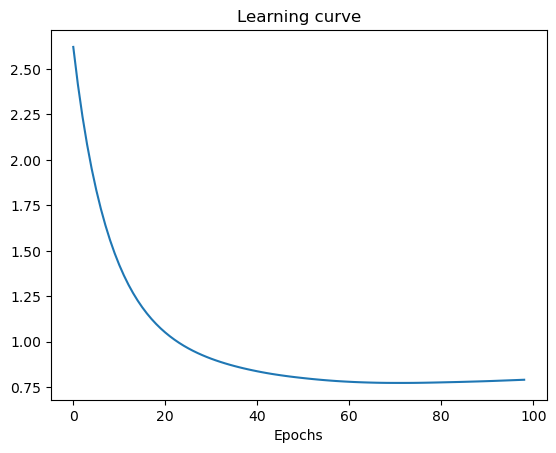

In [7]:
plt.plot(cost_history[1:])
plt.title("Learning curve")
plt.xlabel("Epochs")
plt.show()

In [8]:
import pickle as pkl

with open('task_importance_model.pkl', 'wb') as file:
    pkl.dump(model, file)